## Steps to implement PCA in Python
To have a better overview of PCA, we recommend to watch the following [video by Steve Brunton](https://www.youtube.com/watch?v=fkf4IBRSeEc)

In [1]:
import numpy as np

In [2]:
# We generate a dummy data set
X = np.random.randint(10,50,100).reshape(20,5)

# Here are dummy generated classification classes ["Yes", "No"]
target = np.random.randint(0,2,20).reshape(20,1)

# We display the 5 first lines of our dummy data set
X[:5,:]

array([[31, 37, 22, 39, 29],
       [15, 21, 42, 46, 42],
       [23, 47, 39, 25, 22],
       [32, 17, 31, 26, 20],
       [15, 39, 39, 36, 48]])

### 1. Subtract the mean of each variable
To center the dataset on the origin, subtract the mean of each variable from the dataset.
This is quite beneficial for determining the covariance matrix. 

In [3]:
# mean Centering the data  
X_meaned = X - np.mean(X , axis = 0)
X_meaned[:5,:]

array([[  0.9 ,   6.45,  -9.2 ,   9.7 ,   1.2 ],
       [-15.1 ,  -9.55,  10.8 ,  16.7 ,  14.2 ],
       [ -7.1 ,  16.45,   7.8 ,  -4.3 ,  -5.8 ],
       [  1.9 , -13.55,  -0.2 ,  -3.3 ,  -7.8 ],
       [-15.1 ,   8.45,   7.8 ,   6.7 ,  20.2 ]])

### 2. Calculate the Covariance Matrix
The [covariance matrix](https://en.wikipedia.org/wiki/Covariance_matrix), which represents the covariance of the elements with one another, is a square matrix. An element's variance alone constitutes its covariance with itself. 

In [4]:
# The default value for rowvar is set to True, 
# remember to set it to False to get the covariance matrix in the required dimensions.
cov_mat = np.cov(X_meaned , rowvar = False)
cov_mat[:5,:]

array([[122.30526316, -34.37368421, -22.86315789,  21.33684211,
        -60.18947368],
       [-34.37368421, 106.26052632,  21.25263158,  21.77368421,
         34.32631579],
       [-22.86315789,  21.25263158, 106.37894737, -16.8       ,
         80.67368421],
       [ 21.33684211,  21.77368421, -16.8       , 142.11578947,
         -2.46315789],
       [-60.18947368,  34.32631579,  80.67368421,  -2.46315789,
        136.58947368]])

### 3. Compute the Eigenvalues and Eigenvectors
Each vector in the eigenvectors of the covariance matrix we obtain represents a principal axis and they are orthogonal to one another.


Higher variability is correlated with higher eigenvalues. As a result, the primary axis with the greater Eigenvalue will be an axis that captures more data variability. 

In [5]:
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
print(f"Eigen Values\n {eigen_values}\n")
print(f"Eigen Vectors\n {eigen_vectors}")

Eigen Values
 [ 30.28566335  70.82574932 102.17257697 154.12956258 256.23644778]

Eigen Vectors
 [[ 0.33574335  0.47171184  0.6568347  -0.08495999  0.4755148 ]
 [ 0.08625713  0.75852515 -0.41369255 -0.38646356 -0.31097216]
 [-0.65242017  0.20205613  0.54518643  0.05591549 -0.48287312]
 [-0.16446989 -0.33299525  0.12195967 -0.91323856  0.11482586]
 [ 0.65355465 -0.22453289  0.29210315 -0.07935047 -0.65637684]]


### 4. Sort Eigenvalues in descending order
Remember each column in the Eigen vector-matrix corresponds to a principal component. Therefore, the principal component that captures the most variability will be found in the first column of our rearranged Eigen vector matrix. 

In [6]:
#sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]

#similarly sort the eigenvectors 
sorted_eigenvectors = eigen_vectors[:,sorted_index]


print(f"Sorted eigen Values\n {sorted_eigenvalue}\n")
print(f"Sorted eigen Vectors\n {sorted_eigenvectors}")

Sorted eigen Values
 [256.23644778 154.12956258 102.17257697  70.82574932  30.28566335]

Sorted eigen Vectors
 [[ 0.4755148  -0.08495999  0.6568347   0.47171184  0.33574335]
 [-0.31097216 -0.38646356 -0.41369255  0.75852515  0.08625713]
 [-0.48287312  0.05591549  0.54518643  0.20205613 -0.65242017]
 [ 0.11482586 -0.91323856  0.12195967 -0.33299525 -0.16446989]
 [-0.65637684 -0.07935047  0.29210315 -0.22453289  0.65355465]]


After having the principal components, to compute the percentage of variance (information) accounted for by each component, we divide the eigenvalue of each component by the sum of eigenvalues.

In [7]:
component = 0
for x in sorted_eigenvalue:
    component += 1
    print(f"PC{component}: {x/np.sum(sorted_eigenvalue)}")

PC1: 0.41756122835670034
PC2: 0.2511685204528071
PC3: 0.16649975877920542
PC4: 0.1154171747994622
PC5: 0.04935331761182479


### 5. Select a subset from the rearranged Eigenvalue matrix
Select a subset from the rearranged Eigenvalue matrix as per our need. We will select the first two principal components (PC).

In [8]:
n_components = 2 # Number of PC
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

### 6. Transform the data
A dot product between the Transpose of the Eigenvector subset and the Transpose of the mean-centered data is the final step in data transformation.

The result of transposing the dot product is data that has been reduced from higher dimensions to lower dimensions. 

In [9]:
X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()
print(X_reduced[:5,:])

[[  3.19078423 -12.0372111 ]
 [-16.82847832 -10.80035059]
 [ -8.94482311  -0.93081037]
 [  9.95453957   8.69659516]
 [-26.06387755  -9.2681584 ]]


### 7. Visualization of the results
The results do not have any sens because, we are working with random generated data.

<AxesSubplot: xlabel='PC1', ylabel='PC2'>

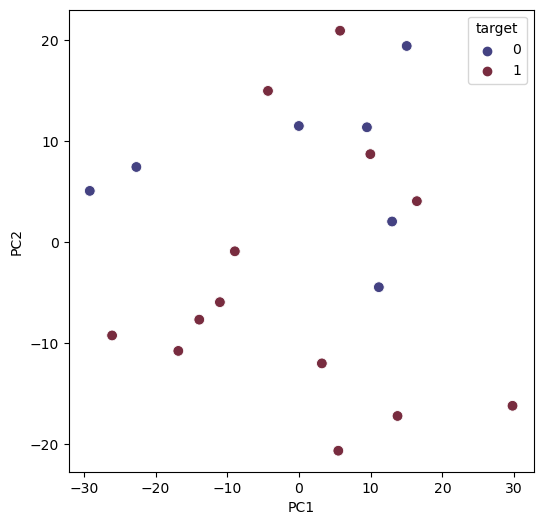

In [10]:
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd

# We create a Pandas DataFrame of reduced Dataset and for original targets
main_df = pd.DataFrame(X_reduced , columns = ['PC1','PC2'])
target_df = pd.DataFrame(target , columns = ['target'])
principal_df = pd.concat([main_df , pd.DataFrame(target_df)] , axis = 1)

# Plot function
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df, x = 'PC1', y = 'PC2', hue = 'target', 
               s = 60 , palette= 'icefire')


### Conclusion
PCA is a very powerfull method for reducing dimensions of data.

As a final exercice, apply PCA on the following data set [IRIS](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data)